## Домашнее задание №1

В этом домашнем задании вы познакомитесь с pytorch сами и сможете попрактиковаться в его применении. 

#### План:

1. Простейшие операции в pytorch
2. Пишем Adam и применяем его к ручной модели
3. Обучаем свою первую нейросеть

In [209]:
import os
import sys
import math
import torch
import random
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
if torch.cuda.is_available():  
  dev = "cuda:0"
else:  
  dev = "cpu" 
print(dev)

cuda:0


### Простейшие операции на pytorch (2 балла)

**Task**: Cоздайте два случайных тензора (двумерных, не квадратных):

In [211]:
x = torch.rand(10, 3)
y = torch.rand(3, 10)

In [212]:
print(x, y, sep='\n')

tensor([[0.8334, 0.9630, 0.6258],
        [0.4046, 0.6461, 0.8410],
        [0.8472, 0.1390, 0.5584],
        [0.1717, 0.6853, 0.2441],
        [0.7686, 0.6292, 0.9896],
        [0.8230, 0.4918, 0.7764],
        [0.7761, 0.8104, 0.6832],
        [0.9008, 0.2039, 0.3553],
        [0.1413, 0.1080, 0.7806],
        [0.6657, 0.4890, 0.9183]])
tensor([[0.8796, 0.7268, 0.9493, 0.2363, 0.2138, 0.4079, 0.7212, 0.5494, 0.2459,
         0.8713],
        [0.3707, 0.1528, 0.7973, 0.7480, 0.6369, 0.6298, 0.6604, 0.9132, 0.9906,
         0.5032],
        [0.6005, 0.6493, 0.5534, 0.7185, 0.4056, 0.8664, 0.1540, 0.1300, 0.0658,
         0.1362]])


**Task**: Умножьте их друг на друга, результат запишите в третий тензор без использования оператора `=`:

In [213]:
res = torch.Tensor()
torch.matmul(x, y, out=res)
print(res)

tensor([[1.4658, 1.1591, 1.9053, 1.3669, 1.0453, 1.4886, 1.3335, 1.4187, 1.2001,
         1.2960],
        [1.1003, 0.9387, 1.3646, 1.1831, 0.8391, 1.3005, 0.8480, 0.9216, 0.7949,
         0.7921],
        [1.1320, 0.9995, 1.2241, 0.7054, 0.4961, 0.9169, 0.7888, 0.6650, 0.3828,
         0.8842],
        [0.5517, 0.3880, 0.8445, 0.7285, 0.5722, 0.7131, 0.6140, 0.7519, 0.7372,
         0.5277],
        [1.5035, 1.2972, 1.7789, 1.3633, 0.9664, 1.5671, 1.1223, 1.1255, 0.8774,
         1.1210],
        [1.3724, 1.1774, 1.6031, 1.1202, 0.8041, 1.3181, 1.0379, 1.0022, 0.7407,
         1.0703],
        [1.3933, 1.1314, 1.7609, 1.2804, 0.9591, 1.4188, 1.2001, 1.2552, 1.0386,
         1.1770],
        [1.0813, 0.9165, 1.2143, 0.6207, 0.4666, 0.8037, 0.8391, 0.7273, 0.4469,
         0.9359],
        [0.6330, 0.6260, 0.6522, 0.6750, 0.4155, 0.8020, 0.2934, 0.2777, 0.1931,
         0.2838],
        [1.3181, 1.1547, 1.5299, 1.1828, 0.8261, 1.3750, 0.9444, 0.9316, 0.7085,
         0.9511]])


**Task**: Реализуйте ReLU использую только pytorch, примените его к тензору `x` (запрещено использование модулей torch.nn и его подмодулей, а также функции torch.relu)

ReLU : $f(x) = \max(0, x)$

In [214]:
def relu_forward(x):
    return torch.max(torch.zeros_like(x), x)
assert torch.all(F.relu(x) == relu_forward(x))

**Task**: Сделайте тоже самое c ELU (запрещено использование модулей torch.nn и его подмодулей):

ELU : $f(x) = \max(0,x) + \min(0, \alpha * (\exp(x) - 1))$

In [215]:
def elu_forward(x, alpha: float=1.0):
    zero_array = torch.zeros_like(x)
    return torch.max(zero_array, x) + torch.min(zero_array, alpha * (torch.exp(x) - 1))

assert torch.all(F.elu(x) == elu_forward(x))

**Task**: LeakyReLU (запрещено использование модулей torch.nn и его подмодулей):

In [216]:
def lrelu_forward(x, alpha:float=0.01):
    zero_array = torch.zeros_like(x)
    return torch.max(zero_array, x) + alpha * torch.min(zero_array, x) 

assert torch.all(F.leaky_relu(x, 0.01) == lrelu_forward(x, 0.01))

**Task**: Теперь перейдем к немного более современным функциям активаций, например Mish, напомним как она выглядит:

$$x * \tanh(\ln(1+e^x))$$

(запрещено использование модулей torch.nn и его подмодулей)

In [217]:
def mish(x):
    return x.mul(torch.tanh(torch.log(torch.ones_like(x).add(torch.exp(x)))))

In [218]:
assert torch.allclose(
    mish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.8651, 0.8651, 0.8651]), 
    atol=1e-4
)

assert torch.allclose(
    mish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.5014, 0.2908, 0.5280, 0.2663], dtype=torch.float64), 
    atol=1e-4
)

**Task**: Теперь реализуем swish, напомним как она выглядит:

$$x * \sigma(x)$$

(запрещено использование модулей torch.nn и его подмодулей)

In [219]:
def swish(x):
    ones_array = torch.ones_like(x)
    return x.mul(ones_array).div(ones_array.add(torch.exp(-x)))

In [220]:
assert torch.allclose(
    swish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.7311, 0.7311, 0.7311]), 
    atol=1e-4
)

assert torch.allclose(
    swish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.4171, 0.2409, 0.4396, 0.2206], dtype=torch.float64), 
    atol=1e-4
)

### Пишем Adam и применяем его к линейной регрессии (4 балла)


В данной секции вам нужно сделать две вещи: 

1. Написать свой собственный оптимизатор подобно тому, который мы писали на семинаре
2. Обучить логистическую регрессию побатчево на картинках из датасета 


#### Adam


$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
m &=& \beta_1 m + (1 - \beta_1) g \\
v &=& \beta_2 v + (1 - \beta_2) Diag(gg^{T}) \\
\hat{m} &=& \frac{m}{1 - \beta_1^{t}} \\
\hat{v} &=& \frac{v}{1 - \beta_2^{t}} \\
w &=& w - \frac{\eta}{\sqrt{\hat{v} + \epsilon}} \odot \hat{m}
\end{eqnarray}
$$

In [221]:
# абстрактный класс, не обращайте внимания
from torch.optim import Optimizer


class InClassOptimizer(Optimizer):
    def step(self):
        """Perform single optimization step."""
        with torch.no_grad(): # выключим градиенты
            for group in self.param_groups:
                self._group_step(group)

    def _group_step(self, group):
        # group ~ dict[str, ...]
        """
        Private helper function to perform
        single optimization step on model parameters.
        """
        raise NotImplementedError()

**Task**: Напишите свою реализацию Adam:

In [222]:
class Adam(InClassOptimizer):
    def __init__(self, params, lr=0.001, eps=1e-13, beta_1=0.9, beta_2=0.999):
        defaults = dict(lr=lr, eps=eps, beta_1=beta_1, beta_2=beta_2)
        super().__init__(params, defaults)

    def _group_step(self, group):
        # One group contains information about values passed in init
        # and model parameters to update
        lr = group['lr']
        eps = group['eps']
        beta_1 = group['beta_1']
        beta_2 = group['beta_2']
        
        for param in filter(lambda x: x.grad is not None, group['params']):
            if param.grad is None: # check if gradients exist and skip if not
                continue
            grad = param.grad
            state = self.state[param]
            # initialize dict if empty
            if not state:
                state['step'] = 0
                state['m'] = torch.zeros_like(param)
                state['v'] = torch.zeros_like(param)
            
            m = state['m']
            v = state['v']
            state['step'] += 1
            m.mul_(beta_1).add_(grad, alpha=1.0 - beta_1) # subscript operators allow inplace changes
            v.mul_(beta_2).addcmul_(grad, grad, value=1.0 - beta_2)
            m_hat = m.div(1 - beta_1 ** state['step'])
            v_hat = v.div(1 - beta_2 ** state['step'])
            param.addcdiv_(m_hat, v_hat.add(eps).sqrt(), value=-lr)




    def _get_adam_buffer(self, param): # why do we even need these functions?
        """
        Get accumulated gradients for Adam.

        Parameters
        ----------
        param : `torch.Tensor`, required
            Model parameter to get accumulated gradients for Adagrad.

        Returns
        -------
        Accumulated Adam gradients for parameter.
        """
        pass

    def _init_adam_buffer(self, param):
        """
        Initialize accumulated gradients for adam.

        Parameters
        ----------
        param : `torch.Tensor`, required
            Model parameter to get accumulated gradients for adam.
        """
        pass

**Task**: Создайте параметры для обучения линейной регрессии, сделаем Xavier ициализацию, которая выглядит следующим образом: 

$$w \sim U[-\frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}, \frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}]$$

где: 

* $n_{in}$ -- размер входа (в нейронах) 
* $n_{out}$ -- размер выхода (в нейронах)

Подумайте над выбором $n_{in}$ и $n_{out}$ самостоятельно. 

In [241]:
def XavierInit(n_input: int, n_output: int):
    weights = torch.empty(n_input, n_output, device=dev, requires_grad=True)
    intercept = torch.zeros(n_output, device=dev, requires_grad=True)
    torch.nn.init.xavier_uniform_(weights) # initialize weights
    return weights, intercept

In [253]:
weights, intercept = XavierInit(28 ** 2, 10)
#weights = weights.to(dev)
#intercept = intercept.to(dev)
print(weights[:5])

tensor([[-6.3002e-02,  6.2323e-02,  2.1881e-02, -3.4326e-02,  5.4548e-02,
         -3.1335e-02,  2.4248e-02,  6.8099e-02, -3.2307e-02,  7.8829e-02],
        [ 5.9648e-02, -1.4889e-02, -5.8972e-02,  6.5714e-02,  3.4253e-02,
          7.1290e-02,  6.9225e-02, -1.6997e-02,  7.6304e-02, -6.3904e-02],
        [-8.5767e-02,  5.2954e-02, -8.4728e-02, -6.9079e-02,  3.8224e-02,
          8.3546e-02, -7.0886e-02,  2.4067e-03,  5.2818e-02,  3.1976e-02],
        [-8.6798e-05, -3.1106e-02, -7.2505e-02, -3.7369e-02, -1.5136e-02,
          7.8347e-02, -8.4313e-02, -6.5186e-02, -5.4877e-02, -6.0058e-02],
        [ 4.0135e-02,  2.4872e-02,  8.1945e-02,  7.1193e-02,  7.2781e-02,
         -3.7287e-02, -3.8660e-02, -7.3490e-02, -3.1769e-03, -1.0221e-02]],
       device='cuda:0', grad_fn=<SliceBackward>)


In [254]:
CustomAdam = Adam([weights, intercept])
CELoss = nn.CrossEntropyLoss()

Загрузим данные и создадим даталоадеры:

In [255]:
import torchvision
import torchvision.transforms as transforms

In [256]:
fashion_mnist_train = torchvision.datasets.FashionMNIST(
    './data',
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)
train_dataloader = torch.utils.data.DataLoader(fashion_mnist_train, batch_size=128, shuffle=True, num_workers=4)
fashion_mnist_eval = torchvision.datasets.FashionMNIST(
    './data',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

eval_dataloader = torch.utils.data.DataLoader(fashion_mnist_eval, batch_size=128, num_workers=4)

torch.Size([1, 28, 28])
Label: 2


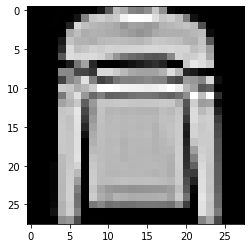

In [257]:
image, label = fashion_mnist_train[5]
plt.imshow(image[0, :, :], cmap="gray")
print(image.shape)
print(f"Label: {label}")
plt.show()

Напишите функцию для тренировки логистической регрессии, она должна: 
    * Делать предсказания 
    * Считать лосс 
    * Подсчитывать градиенты
    * Делать шаг оптимизации
    * Обнулять посчитанные градиенты
    * Считать метрики 
    * Возвращать полученные метрики
    
После этого предусмотрите возможность визуализировать метрики, чтобы нарисовать картинки, а именно от вас требуется визуализировать: 

    * Зависимость лосса от количества итераций
    * Зависимость доли правильных ответов от количества итераций

In [258]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, weights, intercept, n_input: int):
        super(LogisticRegression, self).__init__()
        self.linear = lambda x: x.matmul(weights).add(intercept)
        self.n_input = n_input
    
    def forward(self, x):
        return torch.nn.functional.softmax(self.linear(x.reshape(-1, self.n_input)), dim=1) # get logistic regression -> apply softmax tranformation

In [259]:
def accuracy(outputs, targets):
    """Computes acccuracy for outputs"""
    _, predictions = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(predictions == targets).item() / len(predictions))

In [260]:
def train_logistic_regression(model, batch, criterion, optimizer):
    model = model.train()
    inputs, targets = batch
    inputs = inputs.to(dev)
    targets = targets.to(dev)
    optimizer.zero_grad()
    outputs = model(inputs) # feed forward
    acc_value = accuracy(outputs, targets) # compute accuracy
    loss = criterion(outputs, targets) # compute loss
    loss.backward()
    optimizer.step()
    return {"loss_value": loss.detach().cpu(), "accuracy_value": acc_value.detach().cpu()} # return scalar tensors

In [261]:
def EvaluateModel(model, batch, criterion, optimizer): # get validation batch and output metrics
    inputs, targets = batch
    inputs = inputs.to(dev)
    targets = targets.to(dev)
    outputs = model(inputs)
    acc_value = accuracy(outputs, targets)
    loss = criterion(outputs, targets)
    return {"loss_value": loss.detach(), "accuracy_value": acc_value.detach()}

In [262]:
def EvaluateEpoch(model, eval_dl, criterion, optimizer):
    losses = []
    accuracies = []
    model = model.eval()
    with tqdm(total=len(eval_dl), file=sys.stdout) as prbar:
      for batch in eval_dl:
          metrics = EvaluateModel(model, batch, criterion, optimizer)
          losses.append(metrics["loss_value"])
          accuracies.append(metrics["accuracy_value"])
          prbar.set_description(f"batch vloss: {round(metrics['loss_value'].item(), 6)}, batch vacc: {round(metrics['accuracy_value'].item(), 6)}")
          prbar.update(1)
    return {"epoch_loss": torch.stack(losses).mean().detach().cpu().item(), "epoch_accuracy": torch.stack(accuracies).mean().detach().cpu().item()}

In [ ]:
#train and evaluate logistic regression
history = []
train_loss = []
train_accuracy = []
model = LogisticRegression(weights, intercept, 28 ** 2)
model = model.to(dev)
for epoch in range(100):
    print(f"Epoch[{epoch}] training...")
    with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
      for batch in train_dataloader:
          metrics = train_logistic_regression(model, batch, CELoss, CustomAdam)
          train_loss.append(metrics["loss_value"].item())
          train_accuracy.append(metrics["accuracy_value"].item())
          prbar.set_description(f"batch tloss: {round(metrics['loss_value'].item(), 6)}, batch tacc: {round(metrics['accuracy_value'].item(), 6)}")
          prbar.update(1)
    epoch_metrics = EvaluateEpoch(model, eval_dataloader, CELoss, CustomAdam)
    history.append(epoch_metrics)
    print(f"epoch [{epoch}], av vloss: {round(epoch_metrics['epoch_loss'], 6)}, av vacc: {round(epoch_metrics['epoch_accuracy'], 6)}")


[2.29017472 2.29021955 2.2897656  ... 1.5808084  1.58468592 1.56603158]


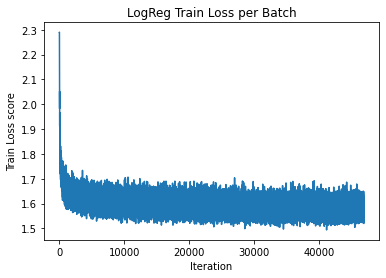

In [264]:
train_loss = np.array(train_loss)
iters = np.arange(1, len(train_loss) + 1)
fig, ax = plt.subplots()
plt.xlabel("Iteration")
plt.ylabel("Train Loss score")
plt.title("LogReg Train Loss per Batch")
ax.plot(iters, train_loss)
plt.show()

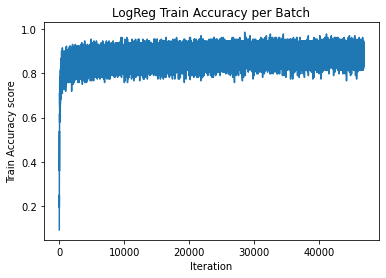

In [265]:
train_accuracy = np.array(train_accuracy)
iters = np.arange(1, len(train_accuracy) + 1)
fig, ax = plt.subplots()
plt.xlabel("Iteration")
plt.ylabel("Train Accuracy score")
plt.title("LogReg Train Accuracy per Batch")
ax.plot(iters, train_accuracy)
plt.show()

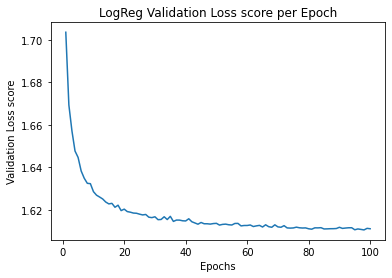

In [266]:
losses = np.array([x["epoch_loss"] for x in history])
x = np.arange(1, len(losses) + 1)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss score")
plt.title("LogReg Validation Loss score per Epoch")
ax.plot(x, losses)
plt.show()

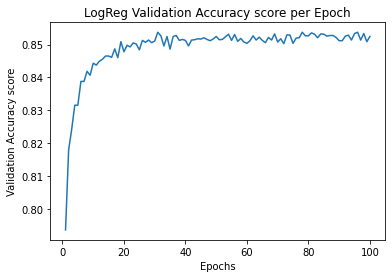

In [267]:
accuracies = np.array([x["epoch_accuracy"] for x in history])
x = np.arange(1, len(accuracies) + 1)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy score")
plt.title("LogReg Validation Accuracy score per Epoch")
ax.plot(x, accuracies)
plt.show()

#### Вопросы к секции: 

* Своими словами и без математики объясните благодаря чему Adam дает несмещенную оценку на квадрат градиента
* Когда модель начала переобучаться? Как вы это поняли? Сделайте визуализацию и докажите свою точку зрения.

### Моя первая нейросеть (4 балла)

В данной секции вам нужно сделать следующие вещи: 

* Реализовать три разных архитектуры нейросетей. Эти архитектуры должны принципиально отличаться друг от друга. Разрешается одной из архитекур брать полностью полносвязную модель. Остальные две должны быть сверточными и сильно отличаться друг от друга. К примеру, одна из таких архитектур может быть VGG подобная сеть, а другая ResNet подобная архитектура. 

* Написать цикл для обучения которым можно обучать все три модели без изменений кода

* Попробовать каждую модель с двумя оптимизаторами: RMSprop и SGD with momentum

* Визуализировать результаты перфоманса каждой модели (две метрики минимум для каждого сетапа, например, лосс и долю правильных ответов). В данном пункте мы ждем от вас визуализацию зависимости метрики от номера итерации обучения.

* Сделать выводы какие были модели были лучше и как вы думаете почему?

**Сейчас мы узнаем, кто же босс этой качалки!**

In [269]:
class DenseMLP(torch.nn.Module):
    def __init__(self, n_input: int, n_output: int):
        super(DenseMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(n_input, 100, bias=True),
            nn.ReLU(True),
            nn.Linear(100, 200, bias=True),
            nn.ReLU(True),
            nn.Linear(200, n_output, bias=True)
        )
        model.apply(_init_weights) # recursively apply xavier initialization to Linear layers
    
    @torch.no_grad()
    def _init_weights(module) -> None:
        if isinstance(module, nn.Linear()):
            nn.init.xavier_uniform_(module.weight)

    def forward(self, x):
        return self.model(torch.flatten(x)) # obtain 1D array instead of 2D

In [277]:
class VGG(torch.nn.Module):
    def __init(self, in_ch: int, n_output: int):
      super(VGG, self).__init__()
      self.kernel_conv, self.kernel_pool = (3, 2)
      self.encoder = _Encoder([in_ch, 32, 64], self.kernel_conv, self.kernel_pool, self.pad)
      self.decoder = _Decoder([6 * 6 * 64, 8 * 64, 64 * 2, n_output])

    def forward(self, x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x
    
    class _Encoder(torch.nn.Module):
      def __init__(self, enc_sizes: list, k_conv: int, k_pool: int):
        super(_Encoder, self).__init__()
        self.encode = nn.Sequential(
          _get_conv_block(enc_sizes[0], enc_sizes[1], k_pool, kernel_size=k_conv, padding=1),
          _get_conv_block(enc_sizes[1], enc_sizes[2], k_pool, kernel_size=k_conv, padding=0)
        )

      @staticmethod
      def _get_conv_block(in_ch: int, out_ch: int, *args, **conv_params):
        block = nn.Sequential(
            nn.Conv2d(in_channels, out_ch, *args, **conv_params),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(),
            nn.MaxPool2d(k_pool)
        )
        return block
      
      def forward(self, x):
        return self.encode(x)

    class _Decoder(torch.nn.Module):
        def __init__(self, dec_sizes: list):
          super(_Decoder, self).__init__()
          self.decode = nn.Sequential(
            nn.Linear(dec_sizes[0], dec_sizes[1]),
            nn.Dropout(0.25),
            nn.Linear(dec_sizes[1], dec_sizes[2]),
            nn.Linear(dec_sizes[2], dec_sizes[3])
          )

        def forward(self, x):
          return self.decode(torch.flatten(x))


In [ ]:
class ResNet(torch.nn.Module):
    pass

In [ ]:
class ModelGym():
    def __init__(self, train_dl, eval_dl, architecture: str, optimizer: str, n_epochs=100):
        try:
          self.net, self.optim = _getArchitectureAndOptimizer(architecture, optimizer, args)
        except:
          raise RuntimeError("ModelGym doesn't support model with suggested architecture or optimizer")
        self.name_architecture = architecture
        self.name_optimizer = optimizer
        if isinstance(self.net, DenseMLP):
          self.net = self.net(784, 10)
        else if isinstance(self.net, VGG):
          self.net = self.net(1, 10)
        else if isinstance(self.net, ResNet):
          pass
        self.train_dl = train_dl
        self.eval_dl = eval_dl
        self.n_epochs = n_epochs
        self.criterion = nn.CrossEntropyLoss()

    def _getArchitectureAndOptimizer(architecture: str, optimizer: str, *args) -> tuple:
      """
        Returns Class Instance for selected architecture (DenseMLP, VGG, ResNet)
        Return torch.optim.Optimizer inherited class (SGD or RMSProp)
      """
        optimizers = {'RMSprop': torch.optim.RMSprop, 'SGD': torch.optim.SGD}
        architectures = {'DenseMLP': DenseMLP, 'VGG': VGG, 'ResNet': ResNet}
        return architectures[architecture], optimizer[optimizer]
    
    def _train_epoch(self):
      """
        Accumulates loss and accuracy over all possible batches
        Does backpropagation for selected architecture
      """
      self.net = self.net.train()
      with tqdm(total=len(self.train_dl), file=sys.stdout) as prbar:
        for images, targets in self.train_dl:
          images = images.to(dev)
          targets = targets.to(dev)
          self.optim.zero_grad()
          outputs = model(inputs) # feed forward
          acc_value = accuracy(outputs, targets) # compute accuracy
          loss = self.criterion(outputs, targets) # compute loss
          loss.backward()
          optimizer.step()
          self.train_loss.append(loss.detach().cpu().item())
          self.train_accuracy.append(acc_value.detach().cpu().item()
          prbar.set_description(f"batch tloss: {round(loss.item(), 6)}, batch tacc: {round(acc_value.item(), 6)}")
          prbar.update(1)


    @torch.no_grad()
    def _validate_epoch(self);
    """
      Calculates Average Loss and Accuracy over Epoch
    """
      loss_history = []
      acc_history = []
      self.net = self.net.eval()
      with tqdm(total=len(self.train_dl), file=sys.stdout) as prbar:
        for images, targets in self.eval_dl:
          images = images.to(dev)
          targets = targets.to(dev)
          outputs = model(inputs) # feed forward
          acc_value = accuracy(outputs, targets) # compute accuracy
          loss = self.criterion(outputs, targets) # compute loss
          loss_history.apppend(loss)
          acc_history.append(acc_value)
          prbar.set_description(f"batch vloss: {round(loss.item(), 6)}, batch vacc: {round(acc_value.item(), 6)}")
          prbar.update(1)
      return torch.stack(loss_history).mean().detach.cpu().item(), torch.stack(acc_history).mean().detach().cpu().item()

    def TrainModel(self):
      """
        Iterates over n_epochs making consecutive calls to _train_epoch and _validate_epoch
        Accumulates validation metrics and prints intermediary results
      """
      self.train_loss = []
      self.train_acc = []
      self.val_loss = []
      self.val_acc = []
      self.net = self.net.to(dev)
      for epoch in range(n_epochs):
        _train_epoch()
        av_loss, av_acc = _validate_epoch()
        val_loss.append(av_loss)
        val_acc.append(av_acc)
        print(f"epoch [{epoch}], av loss: {av_loss}, av acc: {av_acc}")
    
    def _display_plot(self, history: list, sample_type: str, metric: str):
      """
        (list) history: one of accumulated metrics over train and validation phases
        (str) sample_type: train, validation
        (str) metric: loss, accuracy
      """
      tmp = np.array(history)
      iterations = np.arange(1, len(tmp) + 1)
      fig, ax = plt.subplots()
      name_iters = "Epoch" if sample_type == 'validation' else 'Iteration'
      plt.xlabel(name_iters)
      plt.ylabel(f"{sample_type} {metric}")
      plt.title(f"{self.name_architecture} {sample_type} {metric} per {name_iters} with {self.name_optimizer}")
      ax.plot(iterations, tmp)
      plt.show()

    def DisplayMetrics(self, sample_type: str, metric: str):
      """
        (str) sample_type: train, validation
        (str) metric: loss, accuracy
      """
      if sample_type != 'train' or sample_type != 'validation' or metric != 'loss' or metric != 'accuracy':
        raise RuntimeError("Metric isn't implemented")
      if sample_type == 'train':
        if metric == 'loss'
          _display_plot(self.train_loss, sample_type, metric)
        else if metric == 'accuracy':
          _display_plot(self.train_acc, sample_type, metric)
      else if metric == 'validation':
        if metric == 'loss'
          _display_plot(self.val_loss, sample_type, metric)
        else if metric == 'accuracy':
          _display_plot(self.val_acc, sample_type, metric)


In [ ]:
second_model = nn.Sequential(
    # your code here
)

In [ ]:
third_model = torch.nn.ModuleDict({
    # your code here
})

In [ ]:
# train and visualize and write summary down there